<a href="https://colab.research.google.com/github/gabrielfea/trabalhos_cd/blob/main/CD_Trabalho_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABALHO 01 - CIÊNCIA DE DADOS

GABRIEL VINICIUS BOIN FREITAS</BR>
LEONARDO CARDOSO SANTOS

<b>1-) Apresentar gráfico do crescimento de casos e mortes de Joinville e os das capitais das regiões Sul e Sudeste. Descreva
observações sobre estes gráficos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/exec1/covid19_casos_brasil.csv')

In [ ]:
#Olhando a "carinha" dos dados
data.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [ ]:
#Entendendo quais colunas existem
data.columns

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population_2019', 'is_last', 'is_repeated',
       'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

In [ ]:
#Conferindo se há cidades com grafias erradas, ex: São Paulo e Sao Paulo
cidades = pd.Series(data.city.unique()).dropna()
cidades.sort_values(inplace=True)
cidades.reset_index(drop=True, inplace=True)
#pd.DataFrame(cidades).style

In [ ]:
#Criando máscara para selecionar as cidades
cidades_maiores = ['São Paulo', 'Rio de Janeiro']
cidades_menores = ['Joinville','Florianópolis','Curitiba','Porto Alegre', 'Belo Horizonte', 'Vitória']

In [ ]:
def imprime_grafs_casos_mortes(cidades_escolhidas,largura,altura, linha):
  fig, axs = plt.subplots(figsize=(largura,altura), sharex=True, sharey=True, nrows=len(cidades_escolhidas)//2, ncols=2)
  for ax, cidade in zip(axs.flat,cidades_escolhidas):
    ax.scatter(data[data.city == cidade].date, data[data.city == cidade].last_available_confirmed, label='Casos')
    ax.scatter(data[data.city == cidade].date, data[data.city == cidade].last_available_deaths, label='Mortes')
    ax.title.set_text(cidade)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xticks([list(data[data.city == cidade].date)[n] for n in np.arange(0, len(data[data.city == cidade].date), 15)])
    ax.plot(data[data.city == cidade].date,[linha]*len(data[data.city == cidade].date), color="green", label=f'{linha} casos')
    ax.legend()
    ax.grid()

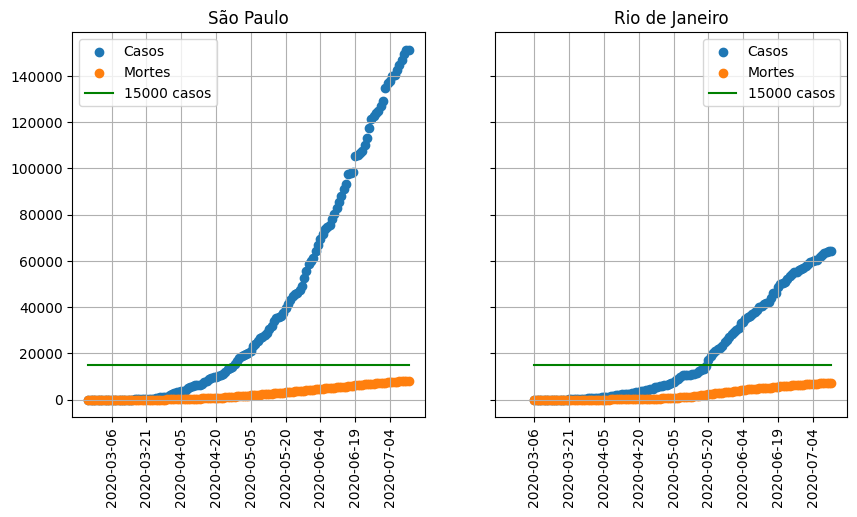

In [ ]:
imprime_grafs_casos_mortes(cidades_maiores,10,5,15000)

Percebe-se, através dos gráficos acima, que em São Paulo, cruzou-se a fronteira de 15.000 casos, representada pela linha verde, semanas antes do que no Rio de Janeiro. isto deve ser explicado pela quantidade de habitantes superior nesta metrópole.
A curva de casos explode de forma exponencial em São Paulo em torno do dia 05/04/2020, enquanto no Rio de Janeiro, em torno do dia 20/04/2020.

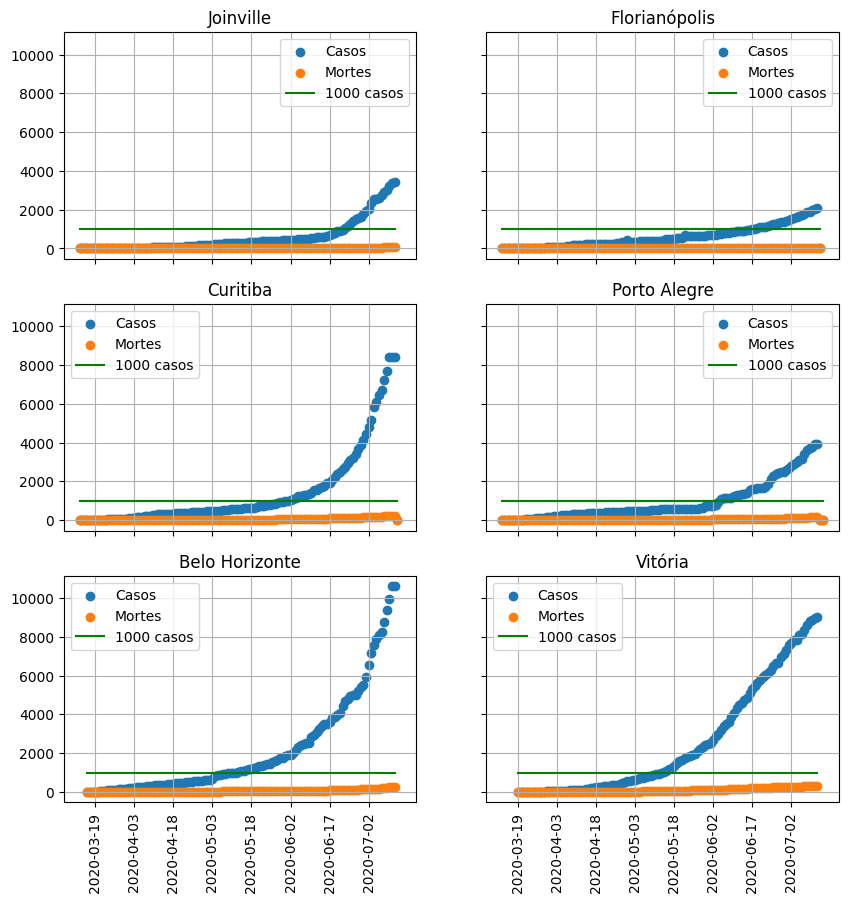

In [ ]:
imprime_grafs_casos_mortes(cidades_menores,10,10,1000)

Nos gráficos acima tem-se cidades com tamanho de populações distintos, mas ao se observar a inclinação da curva de casos, percebe-se uma inclinação mais rápida das cidades mais ao norte do Brasil para as mais ao sul. Vitória e Belo Horizonte começam a explodir o número de casos em final de abril, já na Região Sul, tudo acontece a partir de meio de maio.

<b>2-) Correlacionar os casos e mortes com sua população para todas as capitais brasileiras. Quais são as cinco cidades com
maiores problemas? Quais são as cinco cidades com pouco/sem problema?

In [ ]:
capitais_no = ["Rio Branco","Porto Velho","Macapá","Manaus","Belém","Palmas","Boa Vista"]
capitais_ne = ["Aracaju","Maceió","Fortaleza","João Pessoa","Natal","Teresina","São Luís","Recife","Salvador"]
capitais_se = ["Vitória","Belo Horizonte","São Paulo","Rio de Janeiro"]
capitais_su = ["Florianópolis","Curitiba","Porto Alegre"]
capitais_co = ["Goiânia","Cuiabá","Campo Grande","Brasília"]
capitais = capitais_no + capitais_ne + capitais_se + capitais_su + capitais_co
len(capitais)

27

In [ ]:
colunas = ['city','last_available_confirmed_per_100k_inhabitants','last_available_death_rate','estimated_population_2019']
analise = data.dropna()
analise[analise.city.isin(capitais)][colunas].groupby('city').mean().round(2).sort_values(by='last_available_confirmed_per_100k_inhabitants', ascending=False)

,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,estimated_population_2019
city,,,
Macapá,873.41,0.02,503327.00
Boa Vista,787.25,0.01,266972.33
Porto Velho,774.70,0.04,529544.00
Vitória,706.14,0.03,362097.00
Aracaju,686.95,0.03,657013.00
Fortaleza,602.15,0.06,2669342.00
São Luís,573.11,0.05,1101884.00
Recife,565.89,0.07,1645727.00
Belém,556.55,0.10,761787.73


Percebe-se, ao analisar a tabela acima, que as 5 cidades com mais casos em relação ao número de habitantes, em média, foram Macapá, Boa Vista, Porto Velho, Vitória e Aracaju. As menos afetadas, neste critério, foram Porto Alegre, Curitiba, Belo Horizonte, Florianópolis e Palmas.
Vale destacar as altas taxas de mortalidade em relação ao número de casos em São Paulo e Rio de Janeiro, o que pode representar uma subnotificação de mortes nas outras cidades, já que a taxa de mortalidade deveria ser padrão. Também pode indicar uma melhora no tipo de tratamento dado ao casos sabidos de COVID nas regiões com menor taxa de mortalidade.

<b>3-) Correlacionar os casos e mortes com sua população para as cidades conforme o seu grupo (tabela abaixo). Quais são as
três cidades com maiores problemas? Listar o nome das suas cidades e a população!


In [ ]:
maiores_SP = data[(data.state == "SP")&(data.city !="São Paulo")][["city","estimated_population_2019"]].dropna().groupby("city").mean().sort_values(by="estimated_population_2019", ascending=False).head(5).index.tolist()
maiores_NE = data[(data.state.isin(["MA","PI","RN","PE","PB","BA","AL","CE","SE"]))&~data.city.isin(capitais)][["city","estimated_population_2019"]].dropna().groupby("city").mean().sort_values(by="estimated_population_2019", ascending=False).head(5).index.tolist()
cidades_selecionadas = ["Blumenau", "Maringá"]+maiores_SP+maiores_NE
analise[analise.city.isin(cidades_selecionadas)][colunas].groupby('city').mean().round(2).sort_values(by='last_available_confirmed_per_100k_inhabitants', ascending=False)

,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,estimated_population_2019
city,,,
Campina Grande,523.61,0.02,409731.00
Olinda,452.68,0.07,392482.00
Caucaia,432.27,0.05,361400.00
São Bernardo do Campo,317.16,0.06,838936.00
Jaboatão dos Guararapes,296.67,0.08,702298.00
Santo André,258.66,0.03,541976.62
Campinas,203.99,0.04,1204073.00
Blumenau,178.58,0.00,357199.00
Guarulhos,177.74,0.10,1379182.00


Conforme a tabela acima apresenta, as cidades mais afetadas (com maior número de casos por habitantes) , no conjunto de 5 maiores cidades de SP sem a capital, 5 maiores cidades do nordeste sem as capitais e Blumenau + Maringá, foram : Campina Grande, Olinda e Caucaia.

<b>4-) Dentre as variáveis abaixo (ver tabela ReportDataDictionary), faça um ranqueamento das que possuem maior correção
com a temperatura da zona 1 (THERMAL ZONE 1 / Zone Mean Air Temperature). Quais destas variáveis seriam
importantes em um modelo preditivo da temperatura da zona 1?<br>
• Environment / Site Outdoor Air Drybulb Temperature (Temperatura externa)<br>
• Environment / Site Wind Speed<br>
• Environment / Site Wind Direction<br>
• Environment / Site Horizontal Infrared Radiation Rate per Area<br>
• Environment / Site Diffuse Solar Radiation Rate per Area<br>
• Environment / Site Direct Solar Radiation Rate per Area<br>
• OFFICE WORK OCC / Schedule Value<br>
• NODE 10 / System Node Mass Flow Rate (Fluxo de Massa)


In [ ]:
import sqlite3

conn   = sqlite3.connect('/content/drive/MyDrive/exec1/eplusout.sql')

In [ ]:
'''
tabelas = pd.read_sql("""
SELECT * FROM sqlite_master WHERE type='table';
""", conn)
'''

'\ntabelas = pd.read_sql("""\nSELECT * FROM sqlite_master WHERE type=\'table\';\n""", conn)\n'

In [ ]:
report_data = pd.read_sql("""
SELECT *
FROM ReportData rd
    LEFT JOIN Time t ON (rd.TimeIndex == t.TimeIndex)
WHERE t.WarmupFlag == 0
""", conn)

In [ ]:
report_data.columns

Index(['ReportDataIndex', 'TimeIndex', 'ReportDataDictionaryIndex', 'Value',
       'TimeIndex', 'Month', 'Day', 'Hour', 'Minute', 'Dst', 'Interval',
       'IntervalType', 'SimulationDays', 'DayType', 'EnvironmentPeriodIndex',
       'WarmupFlag'],
      dtype='object')

In [ ]:
report_data_dictionary = pd.read_sql("""
SELECT *
FROM ReportDataDictionary rd
""", conn)

In [ ]:
report_data_dictionary

,ReportDataDictionaryIndex,IsMeter,Type,IndexGroup,TimestepType,KeyValue,Name,ReportingFrequency,ScheduleName,Units
0,6,0,Avg,Zone,HVAC System,Environment,Site Outdoor Air Drybulb Temperature,Zone Timestep,None,C
1,7,0,Avg,Zone,HVAC System,Environment,Site Wind Speed,Zone Timestep,None,m/s
2,8,0,Avg,Zone,HVAC System,Environment,Site Wind Direction,Zone Timestep,None,deg
3,9,0,Avg,Zone,HVAC System,Environment,Site Horizontal Infrared Radiation Rate per Area,Zone Timestep,None,W/m2
4,10,0,Avg,Zone,HVAC System,Environment,Site Diffuse Solar Radiation Rate per Area,Zone Timestep,None,W/m2
...,...,...,...,...,...,...,...,...,...,...
75,507,0,Avg,System,Zone,NODE 16,System Node Mass Flow Rate,Zone Timestep,None,kg/s
76,508,0,Avg,System,Zone,NODE 1,System Node Mass Flow Rate,Zone Timestep,None,kg/s
77,509,0,Avg,System,Zone,NODE 19,System Node Mass Flow Rate,Zone Timestep,None,kg/s
78,510,0,Avg,System,Zone,NODE 14,System Node Mass Flow Rate,Zone Timestep,None,kg/s


In [ ]:
filtro_keyvalue = ["Environment", "OFFICE WORK OCC", "NODE 10", "THERMAL ZONE 1"]
filtro_name = ["Zone Mean Air Temperature","Site Outdoor Air Drybulb Temperature", "Site Wind Speed", "Site Wind Direction", "Site Horizontal Infrared Radiation Rate per Area", "Site Diffuse Solar Radiation Rate per Area", "Site Direct Solar Radiation Rate per Area", "Schedule Value", "System Node Mass Flow Rate" ]
variaveis = report_data_dictionary[(report_data_dictionary.KeyValue.isin(filtro_keyvalue))&(report_data_dictionary.Name.isin(filtro_name))]


,ReportDataDictionaryIndex,IsMeter,Type,IndexGroup,TimestepType,KeyValue,Name,ReportingFrequency,ScheduleName,Units
0,6,0,Avg,Zone,HVAC System,Environment,Site Outdoor Air Drybulb Temperature,Zone Timestep,None,C
1,7,0,Avg,Zone,HVAC System,Environment,Site Wind Speed,Zone Timestep,None,m/s
2,8,0,Avg,Zone,HVAC System,Environment,Site Wind Direction,Zone Timestep,None,deg
3,9,0,Avg,Zone,HVAC System,Environment,Site Horizontal Infrared Radiation Rate per Area,Zone Timestep,None,W/m2
4,10,0,Avg,Zone,HVAC System,Environment,Site Diffuse Solar Radiation Rate per Area,Zone Timestep,None,W/m2
5,11,0,Avg,Zone,HVAC System,Environment,Site Direct Solar Radiation Rate per Area,Zone Timestep,None,W/m2
12,104,0,Avg,Zone,HVAC System,THERMAL ZONE 1,Zone Mean Air Temperature,Zone Timestep,None,C
25,282,0,Avg,Zone,HVAC System,OFFICE WORK OCC,Schedule Value,Zone Timestep,None,
70,502,0,Avg,System,Zone,NODE 10,System Node Mass Flow Rate,Zone Timestep,None,kg/s


In [ ]:
#Visto que no dicionário do Report Data tem as variáveis que quero estudar e seus índices e elas vão estar na tabela Report Data, cada uma comseu índice
#Basta criar um tabelão com todas variáveis a serem correlacionadas com a principal THERMAL ZONE 1 / Zone Mean Air Temperature e pivotear pelo tempo para gerar a mariz de correlação

In [ ]:
report_data_filtrado = report_data[report_data.ReportDataDictionaryIndex.isin(variaveis.ReportDataDictionaryIndex)].join(variaveis.set_index("ReportDataDictionaryIndex"), on="ReportDataDictionaryIndex")

In [ ]:
report_data_filtrado.head(2)

,ReportDataIndex,TimeIndex,ReportDataDictionaryIndex,Value,TimeIndex,Month,Day,Hour,Minute,Dst,...,WarmupFlag,IsMeter,Type,IndexGroup,TimestepType,KeyValue,Name,ReportingFrequency,ScheduleName,Units
0,120961,8785,6,2.003333,8785,1,1,0,1,0,...,0,0,Avg,Zone,HVAC System,Environment,Site Outdoor Air Drybulb Temperature,Zone Timestep,None,C
1,120962,8785,7,1.800000,8785,1,1,0,1,0,...,0,0,Avg,Zone,HVAC System,Environment,Site Wind Speed,Zone Timestep,None,m/s


In [ ]:
report_data_filtrado.columns

Index(['ReportDataIndex', 'TimeIndex', 'ReportDataDictionaryIndex', 'Value',
       'TimeIndex', 'Month', 'Day', 'Hour', 'Minute', 'Dst', 'Interval',
       'IntervalType', 'SimulationDays', 'DayType', 'EnvironmentPeriodIndex',
       'WarmupFlag', 'IsMeter', 'Type', 'IndexGroup', 'TimestepType',
       'KeyValue', 'Name', 'ReportingFrequency', 'ScheduleName', 'Units'],
      dtype='object')

In [ ]:
analise = report_data_filtrado.pivot_table(index=['Month', 'Day', 'Hour', 'Minute'], columns="Name", values="Value")

In [ ]:
analise.head()

Name                   Schedule Value  \
Month Day Hour Minute                   
1     1   0    1                  0.0   
               2                  0.0   
               3                  0.0   
               4                  0.0   
               5                  0.0   

Name                   Site Diffuse Solar Radiation Rate per Area  \
Month Day Hour Minute                                               
1     1   0    1                                              0.0   
               2                                              0.0   
               3                                              0.0   
               4                                              0.0   
               5                                              0.0   

Name                   Site Direct Solar Radiation Rate per Area  \
Month Day Hour Minute                                              
1     1   0    1                                             0.0   
               2                                             0.0   
               3                                             0.0   
               4                                             0.0   
               5                                             0.0   

Name                   Site Horizontal Infrared Radiation Rate per Area  \
Month Day Hour Minute                                                     
1     1   0    1                                             255.766667   
               2                                             256.533333   
               3                                             257.300000   
               4                                             258.066667   
               5                                             258.833333   

Name                   Site Outdoor Air Drybulb Temperature  \
Month Day Hour Minute                                         
1     1   0    1                                   2.003333   
               2                                   2.106667   
               3                                   2.210000   
               4                                   2.313333   
               5                                   2.416667   

Name                   Site Wind Direction  Site Wind Speed  \
Month Day Hour Minute                                         
1     1   0    1                 28.083333              1.8   
               2                 25.166667              1.8   
               3                 22.250000              1.8   
               4                 19.333333              1.8   
               5                 16.416667              1.8   

Name                   System Node Mass Flow Rate  Zone Mean Air Temperature  
Month Day Hour Minute                                                         
1     1   0    1                             0.00                  19.063105  
               2                             0.00                  18.730946  
               3                             0.13                  18.731361  
               4                             0.13                  18.918310  
               5                             0.13                  19.147688

<Axes: xlabel='Name', ylabel='Name'>

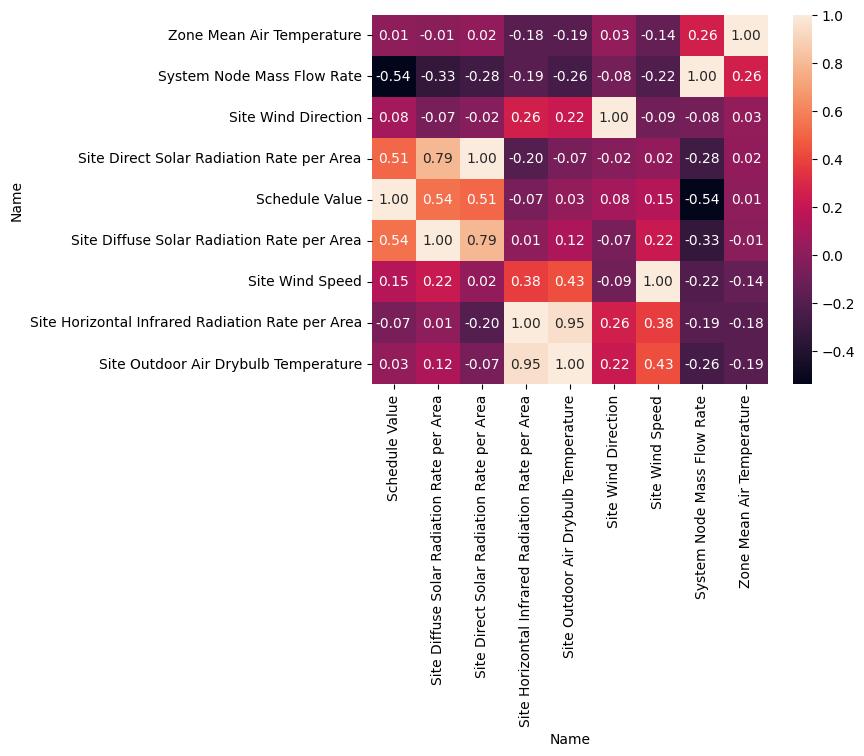

In [164]:
import seaborn as sns
sns.heatmap(analise.corr(method="pearson").sort_values(ascending=False, by=["Zone Mean Air Temperature"]).round(2), annot=True, fmt='.2f')

In [152]:
analise.corr(method="pearson")["Zone Mean Air Temperature"].sort_values(ascending=False).round(2)

Name
Zone Mean Air Temperature                           1.00
System Node Mass Flow Rate                          0.26
Site Wind Direction                                 0.03
Site Direct Solar Radiation Rate per Area           0.02
Schedule Value                                      0.01
Site Diffuse Solar Radiation Rate per Area         -0.01
Site Wind Speed                                    -0.14
Site Horizontal Infrared Radiation Rate per Area   -0.18
Site Outdoor Air Drybulb Temperature               -0.19
Name: Zone Mean Air Temperature, dtype: float64

A tabela acima apresenta a tabela de correlações entre as features questionadas e a variável alvo Zone Mean Air Temperature. As features com maior correlação negativa ou positiva são as melhores para serem analisadas em um modelo preditivo. Porém, aqui não está sendo considerada a correlação intra-features, pois features combinadas podem ter uma grande importância no modelo preditivo, o que não é percebido em correlações individuais. Exemplo disso é a velocidade do vento e sua direção.
System Node Mass Flow Rate, Site Outdoor Air Drybulb Temperature, Site Horizontal Infrared Radiation Rate per Area e Site Wind Speed seriam as melhores variáveis em um modelo preditivo.

<b>5-) Faça gráficos para cada dia. Qual a relação entre a temperatura externa e a temperatura da zona? Qual a relação entre o
Fluxo de Massa e a temperatura da zona? Qual a relação entre o Fluxo de Massa e a temperatura externa?

<Axes: xlabel='Name', ylabel='Name'>

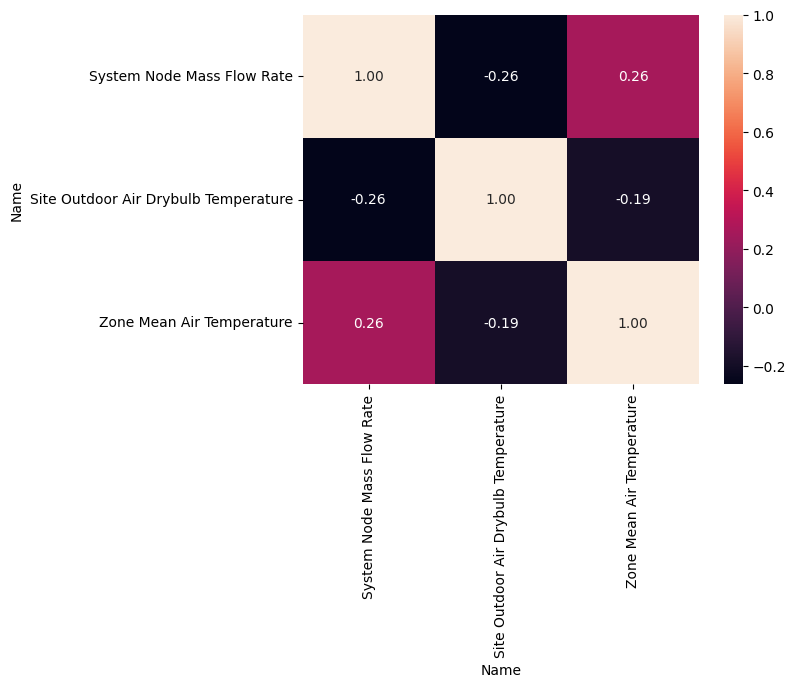

In [202]:
analise_restrita = analise[["System Node Mass Flow Rate","Site Outdoor Air Drybulb Temperature","Zone Mean Air Temperature"]]
sns.heatmap(analise_restrita.corr(), annot=True, fmt='.2f')

A relação entre o fluxo de massa e a temperatura da zona é linearmente proporcional, com correlação de 0.26. A relação entre o fluxo de massa e a temperatura externa é inversamente proporcional, -0.26. Já a relação entre a temperatura externa e a interna é inversamente proporcional, -0.19.
Através dos gráficos dessas variações normalizadas, é possível entender melhor este sistema e o porque dessas correlações.
Conforme a temperatura externa aumenta, o sistema de aquecimento acaba sendo desligado, gerando menos fluxo de massa interno. A temperatura interna, então, cai, fazendo o sistema de aquecimento ser religado, o fluxo de massa aumentar e a temperatura interna aumentar.
Seguem os gráficos impressos a seguir.

In [203]:
dias = analise_restrita.index.get_level_values("Day").unique()

In [209]:
#normalizando os dados para ser possível compará-los visualmente
analise_restrita = (analise_restrita - analise_restrita.mean())/analise_restrita.std()

In [ ]:
'''
for d in dias:
  analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")
'''

<Axes: title={'center': 'Dia 1'}, xlabel='Minutos'>

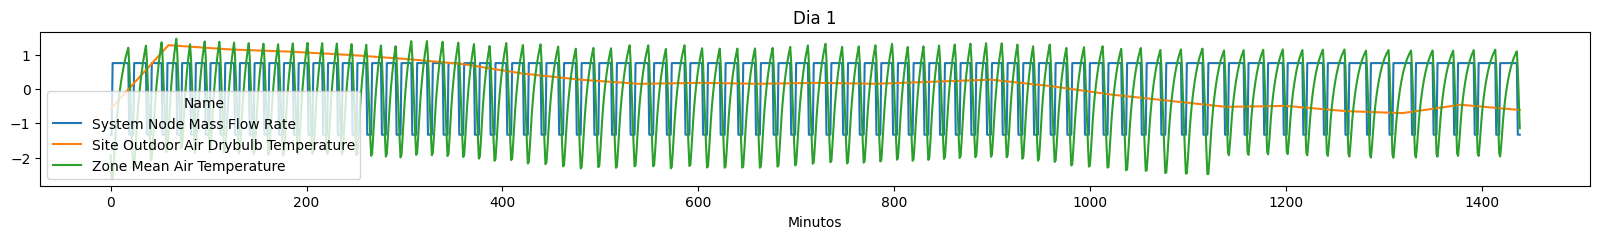

In [219]:
d=1
analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")

<Axes: title={'center': 'Dia 2'}, xlabel='Minutos'>

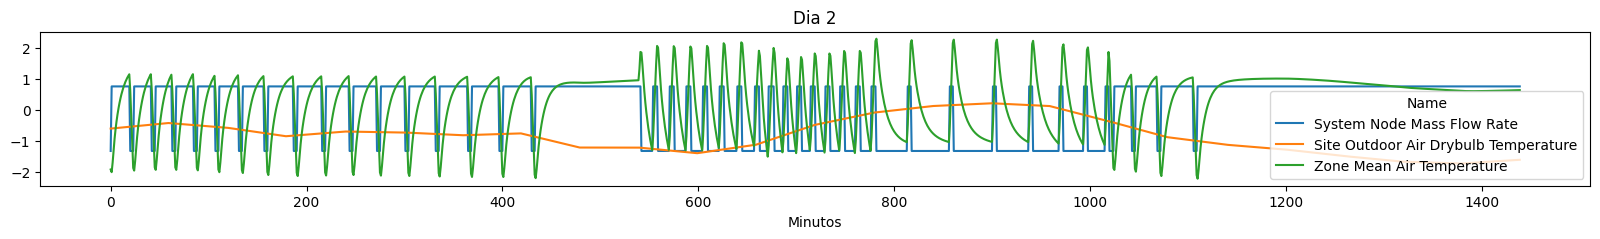

In [220]:
d=2
analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")

<Axes: title={'center': 'Dia 3'}, xlabel='Minutos'>

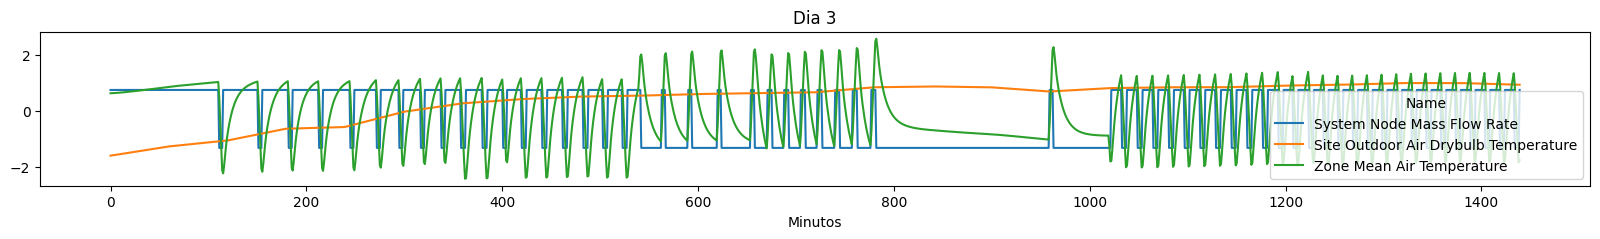

In [221]:
d=3
analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")

<Axes: title={'center': 'Dia 4'}, xlabel='Minutos'>

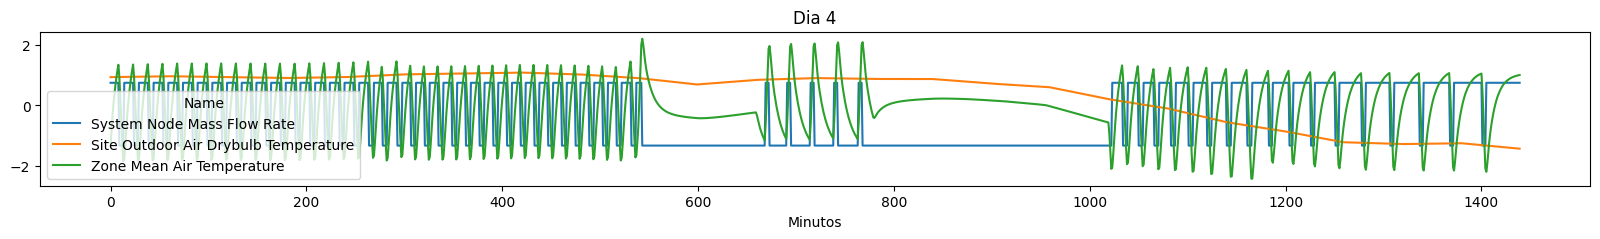

In [222]:
d=4
analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")

<Axes: title={'center': 'Dia 5'}, xlabel='Minutos'>

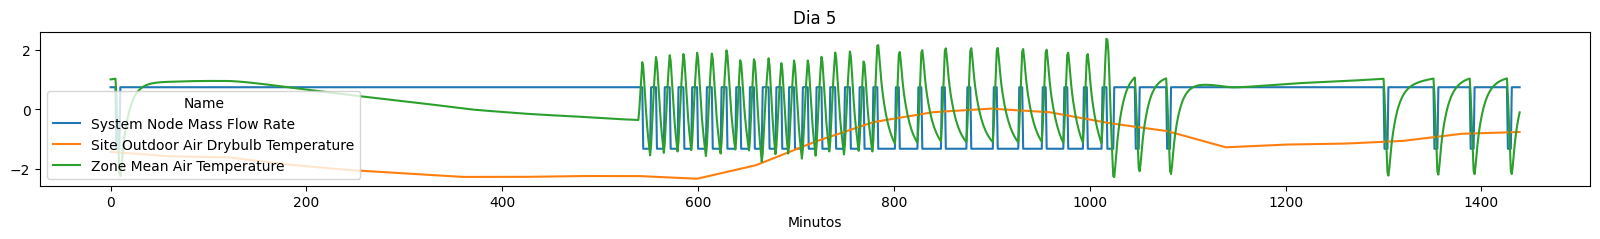

In [223]:
d=5
analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")

<Axes: title={'center': 'Dia 6'}, xlabel='Minutos'>

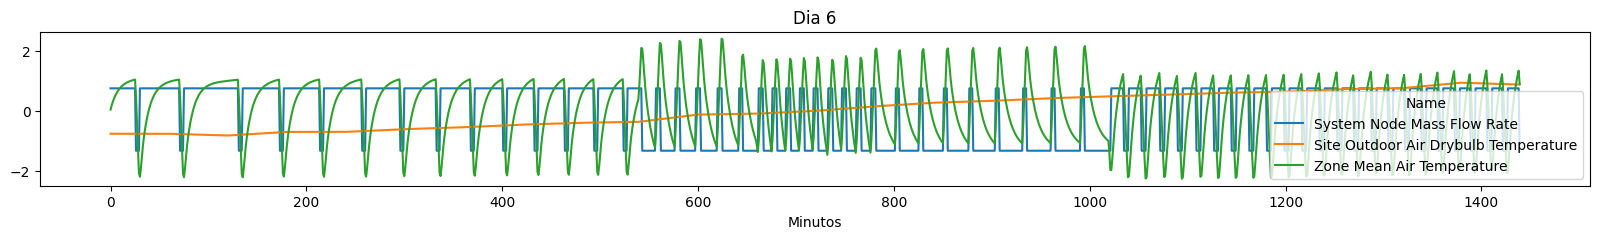

In [224]:
d=6
analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")

<Axes: title={'center': 'Dia 7'}, xlabel='Minutos'>

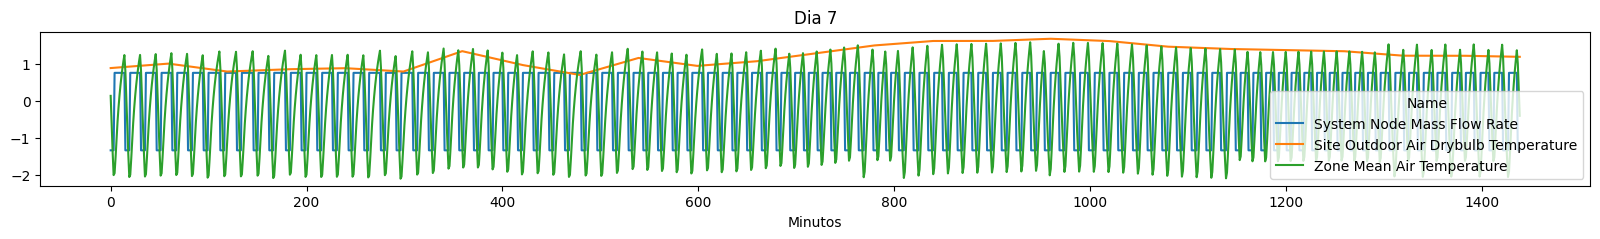

In [225]:
d=7
analise_restrita[analise_restrita.index.get_level_values("Day") == d].reset_index().iloc[:,4:7].plot(figsize=(20,2), title=f"Dia {d}", xlabel="Minutos")